# Scoring
#### Gros probleme, la variable fraude a seulement 7246 on peut avoir un modele bete que previse toujours 0....

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.model_selection import train_test_split

In [95]:
data = pd.read_csv("D:\\Universita\\STatistica\\TIDE\\Deeplearn\\Scoring\\autorisations.csv")

In [96]:
data.head()

,Carte,Pays,Date,Heure,dateheure,CodeRep,MCC,Montant,fraude,FM_Velocity_Condition_3,...,FM_Sum_12,FM_Sum_24,FM_Redondance_MCC_3,FM_Redondance_MCC_6,FM_Redondance_MCC_12,FM_Redondance_MCC_24,FM_Difference_Pays_3,FM_Difference_Pays_6,FM_Difference_Pays_12,FM_Difference_Pays_24
0,0,840,02/12/2003,17:47:52,02/12/2003,15,5812,69.25,0,0,...,69.25,69.25,1,1,1,1,1,1,1,1
1,1,158,25/11/2003,06:00:20,25/11/2003,15,5311,1.00,0,0,...,1.00,1.00,1,1,1,1,1,1,1,1
2,2,826,12/11/2003,14:10:57,12/11/2003,15,5211,516.95,0,0,...,516.95,516.95,1,1,1,1,1,1,1,1
3,3,840,07/11/2003,03:41:55,07/11/2003,14,7399,0.01,0,0,...,0.01,0.01,1,1,1,1,1,1,1,1
4,4,158,23/11/2003,05:07:03,23/11/2003,15,5311,1.00,0,0,...,1.00,1.00,1,1,1,1,1,1,1,1


In [97]:
data.shape

(1151432, 25)

In [98]:
data.dtypes

Carte                         int64
Pays                          int64
Date                         object
Heure                        object
dateheure                    object
CodeRep                       int64
MCC                           int64
Montant                     float64
fraude                        int64
FM_Velocity_Condition_3       int64
FM_Velocity_Condition_6       int64
FM_Velocity_Condition_12      int64
FM_Velocity_Condition_24      int64
FM_Sum_3                    float64
FM_Sum_6                    float64
FM_Sum_12                   float64
FM_Sum_24                   float64
FM_Redondance_MCC_3           int64
FM_Redondance_MCC_6           int64
FM_Redondance_MCC_12          int64
FM_Redondance_MCC_24          int64
FM_Difference_Pays_3          int64
FM_Difference_Pays_6          int64
FM_Difference_Pays_12         int64
FM_Difference_Pays_24         int64
dtype: object

In [99]:
data["fraude"].sum()/len(data)

0.006293033370620237

In [100]:
data.dtypes

Carte                         int64
Pays                          int64
Date                         object
Heure                        object
dateheure                    object
CodeRep                       int64
MCC                           int64
Montant                     float64
fraude                        int64
FM_Velocity_Condition_3       int64
FM_Velocity_Condition_6       int64
FM_Velocity_Condition_12      int64
FM_Velocity_Condition_24      int64
FM_Sum_3                    float64
FM_Sum_6                    float64
FM_Sum_12                   float64
FM_Sum_24                   float64
FM_Redondance_MCC_3           int64
FM_Redondance_MCC_6           int64
FM_Redondance_MCC_12          int64
FM_Redondance_MCC_24          int64
FM_Difference_Pays_3          int64
FM_Difference_Pays_6          int64
FM_Difference_Pays_12         int64
FM_Difference_Pays_24         int64
dtype: object

In [101]:
info_df_num = data.describe()
info_types = pd.DataFrame(data.dtypes)

In [102]:
nb_nan = []
nb_distincts =[]
for v in info_df_num.columns.tolist():
    nb_nan.append(data[v].isnull().sum())
    nb_distincts.append(len(set(data[v])))
    
info_df_num_2 = pd.DataFrame()
info_df_num_2 ["variables"] = info_df_num.columns.tolist()
info_df_num_2["Nb value distinct"] = nb_distincts
info_df_num_2["Nb value missing"] = nb_nan 
info_df_num_2["%Modalité_missing"] = info_df_num_2["Nb value missing"]/len(data)

print(info_df_num_2)

                   variables  Nb value distinct  Nb value missing  \
0                      Carte             198044                 0   
1                       Pays                167                 0   
2                    CodeRep                 15                 0   
3                        MCC                661                 0   
4                    Montant              81202                 0   
5                     fraude                  2                 0   
6    FM_Velocity_Condition_3                 47                 0   
7    FM_Velocity_Condition_6                 82                 0   
8   FM_Velocity_Condition_12                111                 0   
9   FM_Velocity_Condition_24                130                 0   
10                  FM_Sum_3             109836                 0   
11                  FM_Sum_6             115524                 0   
12                 FM_Sum_12             121192                 0   
13                 FM_Sum_24      

In [103]:
list_var_cat = info_types[info_types[0]=="object"].index.tolist()

info_df_cat = pd.DataFrame()
nb_nan = []
nb_distincts =[]
for v in list_var_cat :
    nb_nan.append(data[v].isnull().sum())
    nb_distincts.append(len(set(data[v])))
    
info_df_cat["variables"] = list_var_cat
info_df_cat["Nb value distinct"] = nb_distincts
info_df_cat["Nb value missing"] = nb_nan

print(info_df_cat)

   variables  Nb value distinct  Nb value missing
0       Date                243                 0
1      Heure              85697                 0
2  dateheure                243                 0


In [104]:
data["Heure"] = data["Heure"].str.split(':', expand=True)[0]
data["Date"] = pd.to_datetime(data["Date"], format='%d/%m/%Y')
data["Month"] = data["Date"].dt.month
data["Month"] = data["Month"].astype('object')
data["CodeRep"]=np.where(data["CodeRep"] == 0,1,0)

# Division of test and train data.
Is it necessary to do it before analysing for possible seasonalities or country risk?

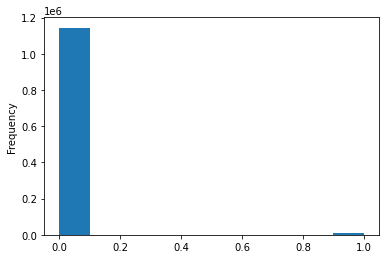

In [105]:
data["fraude"].plot(kind = 'hist');

In [106]:
X = data.drop(columns=["fraude","Carte", "Date", "dateheure", "MCC"])
Y = data["fraude"]

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.3, stratify=Y)
train = X_train.join(Y_train)

## Is there a country specific risk involved?

In [108]:
summa= train.groupby("Pays").sum()[["fraude"]]
summa.sort_values(by="fraude")

,fraude
Pays,
8,0
508,0
498,0
496,0
492,0
...,...
56,390
380,493
840,650


In [109]:
counts = pd.Series(train["Pays"]).value_counts()
counts = pd.DataFrame(counts)
counts = counts.rename(columns={"Pays":"NTrans"})

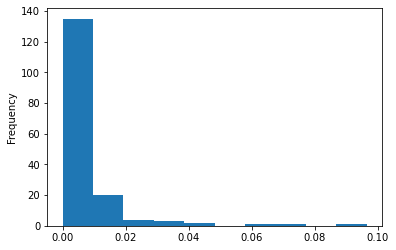

In [110]:
cmerged = pd.merge(counts,summa,left_index=True, right_index=True)
cmerged.reset_index(inplace=True)
cmerged = cmerged.rename(columns={"index":"Pays"})
cmerged["Fratio"] = cmerged["fraude"]/cmerged["NTrans"]
cmerged["Fratio"].plot(kind = 'hist');

In [111]:
sum(cmerged["Fratio"]>0.025)

10

In [112]:
cmerged[(cmerged["Fratio"]>0.025)]

,Pays,NTrans,fraude,Fratio
13,36,5569,157,0.028192
14,76,5159,246,0.047684
16,792,4315,253,0.058633
38,356,1767,49,0.027731
53,188,827,28,0.033857
65,608,572,19,0.033217
80,320,255,11,0.043137
96,218,129,9,0.069767
101,862,114,11,0.096491
103,690,103,3,0.029126


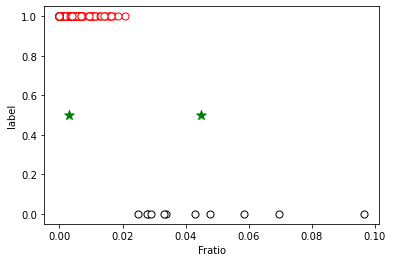

In [113]:
kmeans = KMeans(n_clusters=2, init='random', n_init=1000)
cmerged['label'] = kmeans.fit_predict(cmerged[['Fratio']])
ax = cmerged[cmerged['label']==0].plot.scatter(x='Fratio', y='label', s=50, color='white', edgecolor='black')
cmerged[cmerged['label']==1].plot.scatter(x='Fratio', y='label', s=50, color='white', ax=ax, edgecolor='red')
plt.scatter(kmeans.cluster_centers_.ravel(), [0.5]*len(kmeans.cluster_centers_), s=100, color='green', marker='*');

In [114]:
cmerged[cmerged['label']==1]

,Pays,NTrans,fraude,Fratio,label
0,840,136230,650,0.004771,1
1,724,128555,873,0.006791,1
2,56,115534,390,0.003376,1
3,826,106114,664,0.006257,1
4,380,70671,493,0.006976,1
...,...,...,...,...,...
162,328,1,0,0.000000,1
163,96,1,0,0.000000,1
164,275,1,0,0.000000,1
165,231,1,0,0.000000,1


In [115]:
# K-Means and a 0.025 threshold level bring the same result

#### And the high risk countries are: Australia (36), Brasil (76), Turkey (792), India (356), Costa Rica (188), Philippines (608), Taiwan (158), Guatemala (320), Ecuador (218), Venezuela (862).

In [116]:
X_train["Pays_ris"]=0

In [117]:
X_train["Pays_ris"]=0
#conditions = [X_train.Pays==36, X_train.Pays==76, X_train.Pays==792, X_train.Pays==356, X_train.Pays==188,
#                                X_train.Pays==608, X_train.Pays==158, X_train.Pays==320, X_train.Pays==218, X_train.Pays==862]
X_train['AUX1'] = np.where(np.logical_or(X_train.Pays==36, X_train.Pays==76, X_train.Pays==792)
                               ,1, 0)
X_train['AUX2'] = np.where(np.logical_or(X_train.Pays==356, X_train.Pays==188, X_train.Pays==608)
                               ,1, 0)
X_train['AUX3'] = np.where(np.logical_or(X_train.Pays==158, X_train.Pays==320, X_train.Pays==218)
                               ,1, 0)
X_train['AUX4'] = np.where(X_train.Pays==862,1,0)
X_train['AUX12'] = np.where(np.logical_or(X_train.AUX1==1, X_train.AUX2==1)
                               ,1, 0)
X_train['Pays_ris'] = np.where(np.logical_or(X_train.AUX12==1, X_train.AUX3==1, X_train.AUX4==1)
                               ,1, 0)
X_train = X_train.drop(columns=["AUX1","AUX2", "AUX3", "AUX4", "AUX12","Pays"])

In [118]:
X_test["Pays_ris"]=0
#conditions = [X_train.Pays==36, X_train.Pays==76, X_train.Pays==792, X_train.Pays==356, X_train.Pays==188,
#                                X_train.Pays==608, X_train.Pays==158, X_train.Pays==320, X_train.Pays==218, X_train.Pays==862]
X_test['AUX1'] = np.where(np.logical_or(X_test.Pays==36, X_test.Pays==76, X_test.Pays==792)
                               ,1, 0)
X_test['AUX2'] = np.where(np.logical_or(X_test.Pays==356, X_test.Pays==188, X_test.Pays==608)
                               ,1, 0)
X_test['AUX3'] = np.where(np.logical_or(X_test.Pays==158, X_test.Pays==320, X_test.Pays==218)
                               ,1, 0)
X_test['AUX4'] = np.where(X_test.Pays==862,1,0)
X_test['AUX12'] = np.where(np.logical_or(X_test.AUX1==1, X_test.AUX2==1)
                               ,1, 0)
X_test['Pays_ris'] = np.where(np.logical_or(X_test.AUX12==1, X_test.AUX3==1, X_test.AUX4==1)
                               ,1, 0)
X_test = X_test.drop(columns=["AUX1","AUX2", "AUX3", "AUX4", "AUX12","Pays"])

In [119]:
sum(X_train["Pays_ris"])/len(X_train)

0.017344870111984833

In [120]:
sum(X_test["Pays_ris"])/len(X_test)

0.017980488087311466

## Verifying if there are clusters in the hours of the day.

In [121]:
sumh= train.groupby("Heure").sum()[["fraude"]]
sumh.sort_values(by="fraude")

,fraude
Heure,
06,67
05,73
04,93
07,93
08,98
03,103
09,139
01,148
02,149


In [122]:
counth = pd.Series(train["Heure"]).value_counts()
counth = pd.DataFrame(counth)
counth = counth.rename(columns={"Heure":"NTrans"})

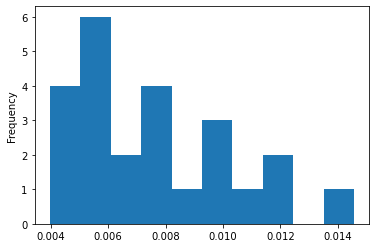

In [123]:
hmerged = pd.merge(counth, sumh, left_index=True, right_index=True)
hmerged.reset_index(inplace=True)
hmerged = hmerged.rename(columns={"index":"Heure"})
hmerged["Fratio"] = hmerged["fraude"]/hmerged["NTrans"]
hmerged["Fratio"].plot(kind = 'hist');

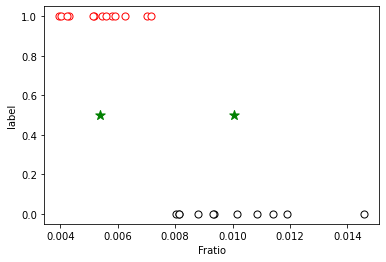

In [124]:
kmeans = KMeans(n_clusters=2, init='random', n_init=1000)
hmerged['label'] = kmeans.fit_predict(hmerged[['Fratio']])
ax = hmerged[hmerged['label']==0].plot.scatter(x='Fratio', y='label', s=50, color='white', edgecolor='black')
hmerged[hmerged['label']==1].plot.scatter(x='Fratio', y='label', s=50, color='white', ax=ax, edgecolor='red')
plt.scatter(kmeans.cluster_centers_.ravel(), [0.5]*len(kmeans.cluster_centers_), s=100, color='green', marker='*');

In [125]:
hmerged[hmerged['label']==1]

,Heure,NTrans,fraude,Fratio,label
0,16,66530,363,0.005456,1
1,15,65782,341,0.005184,1
2,17,65123,377,0.005789,1
3,14,57685,296,0.005131,1
4,18,55390,328,0.005922,1
5,11,54692,235,0.004297,1
6,12,53194,333,0.006260,1
7,13,48693,272,0.005586,1
8,10,47104,187,0.003970,1
10,09,34581,139,0.004020,1


Fraudes are more frequent during night hours even if it is possible that they are constant during the day and the thing which changes the most is the number of transactions during the day.

## Checking possible seasonalities.

In [126]:
summ= train.groupby("Month").sum()[["fraude"]]
summ.sort_values(by="fraude")

,fraude
Month,
4,495
2,531
11,562
3,622
5,689
1,696
12,730
6,747


In [127]:
mcount = pd.Series(train["Month"]).value_counts()
mcount = pd.DataFrame(mcount)
mcount = mcount.rename(columns={"Month":"NTrans"})

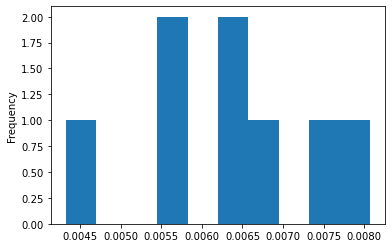

In [128]:
mmerged = pd.merge(mcount, summ, left_index=True, right_index=True)
mmerged.reset_index(inplace=True)
mmerged = mmerged.rename(columns={"index":"Month"})
mmerged["Fratio"] = mmerged["fraude"]/mmerged["NTrans"]
mmerged["Fratio"].plot(kind = 'hist');

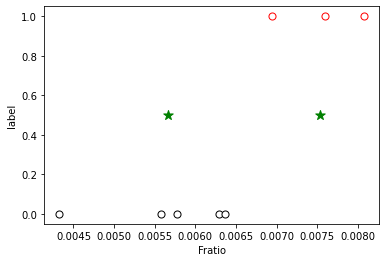

In [129]:
kmeans = KMeans(n_clusters=2, init='random', n_init=1000)
mmerged['label'] = kmeans.fit_predict(mmerged[['Fratio']])
ax = mmerged[mmerged['label']==0].plot.scatter(x='Fratio', y='label', s=50, color='white', edgecolor='black')
mmerged[mmerged['label']==1].plot.scatter(x='Fratio', y='label', s=50, color='white', ax=ax, edgecolor='red')
plt.scatter(kmeans.cluster_centers_.ravel(), [0.5]*len(kmeans.cluster_centers_), s=100, color='green', marker='*');

In [130]:
mmerged[mmerged['label']==1]

,Month,NTrans,fraude,Fratio,label
2,6,107543,747,0.006946,1
4,12,96164,730,0.007591,1
7,1,86233,696,0.008071,1


In [131]:
mmerged[mmerged['label']==0]

,Month,NTrans,fraude,Fratio,label
0,5,119275,689,0.005777,0
1,4,114400,495,0.004327,0
3,3,98875,622,0.006291,0
5,2,95150,531,0.005581,0
6,11,88362,562,0.006360,0


In this case I can't see a difference in frauds given the month.

# Modelisation

In [132]:
X_train = X_train.drop(columns=["Heure","Month"]) # Can be held eventually
X_test = X_test.drop(columns=["Heure","Month"]) # Can be held eventually

## Random Forest for base model

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer,Categorical
from timeit import default_timer as timer
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

In [46]:
# param_dict_bayes_RF = {
#     'n_estimators' : Integer(10,200),
#     'criterion': Categorical(['gini', 'entropy']), 
#     'max_depth': Integer(3,10),
#     'bootstrap':Categorical([True,False])}

# NB_ITER = 5

# opt = BayesSearchCV(RandomForestClassifier(),param_dict_bayes_RF,n_iter=NB_ITER,cv=5,scoring = 'roc_auc')

# start = timer()  
# opt.fit(X_train, Y_train)
# delais = timer()- start
# best_param_opti_bayes = opt.best_params_
# best_score_opti_bayes = opt.best_score_
# all_result_opti_bayes = opt.cv_results_
# print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LE RANDOM FOREST #### ")
# print(" \n Durée de recherche en seconde :")
# print(delais)
# print("\n Paramètres optimaux : ")
# best_param_opti_bayes =opt.best_params_
# print(best_param_opti_bayes)
# best_score_opti_bayes = opt.best_score_
# print("\n Résultats  : " + str(best_score_opti_bayes))

 #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LE RANDOM FOREST #### 
 
 Durée de recherche en seconde :
2517.2420313000002

 Paramètres optimaux : 
OrderedDict([('bootstrap', False), ('criterion', 'entropy'), ('max_depth', 10), ('n_estimators', 152)])

 Résultats  : 0.8110954897230045


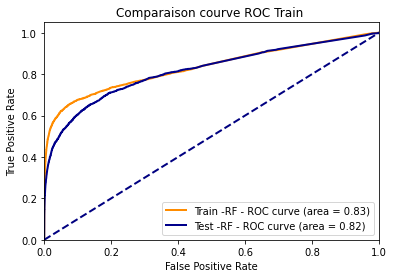

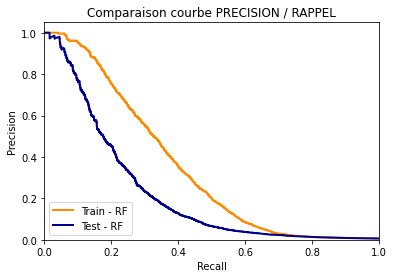

In [90]:
# rf_clf = RandomForestClassifier(**opt.best_params_)

# rf_clf.fit(X_train,Y_train)

# #Calcul des métriques

# fpr_train_RF, tpr_train_RF, thresholds_train_RF = roc_curve(Y_train, rf_clf.predict_proba(X_train)[:,1])
# roc_auc_train_RF = auc(fpr_train_RF, tpr_train_RF)

# fpr_test_RF, tpr_test_RF, thresholds_test_RF = roc_curve(Y_test, rf_clf.predict_proba(X_test)[:,1])
# roc_auc_test_RF = auc(fpr_test_RF, tpr_test_RF)

# plt.figure()
# lw = 2
# plt.plot(fpr_train_RF, tpr_train_RF, color='darkorange',
#          lw=lw, label='Train -RF - ROC curve (area = %0.2f)' % roc_auc_train_RF)
# plt.plot(fpr_test_RF, tpr_test_RF, color='darkblue',
#          lw=lw, label='Test -RF - ROC curve (area = %0.2f)' % roc_auc_test_RF)

# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Comparaison courve ROC Train ')
# plt.legend(loc="lower right")
# plt.show()



# ### COURBES PRECISION RAPPEL

# precision_train_RF, recall_train_RF, thresholds_train_RF = precision_recall_curve(Y_train,
#                                                                          rf_clf.predict_proba(X_train)[:,1])

# precision_test_RF, recall_test_RF, thresholds_test_RF = precision_recall_curve(Y_test,
#                                                                          rf_clf.predict_proba(X_test)[:,1])

# plt.figure()
# lw = 2
# plt.plot(recall_train_RF,precision_train_RF, color='darkorange',
#          lw=lw, label='Train - RF')
# plt.plot(recall_test_RF,precision_test_RF, color='darkblue',
#          lw=lw, label='Test - RF')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Comparaison courbe PRECISION / RAPPEL')
# plt.legend(loc="lower left")
# plt.show()

In [133]:
importance_variable_rf = pd.DataFrame()
importance_variable_rf["Variable"]= X_train.columns.tolist()
importance_variable_rf["Feature Importance"] = rf_clf.feature_importances_

importance_variable_rf.sort_values(by = "Feature Importance", axis=0, ascending=False, inplace=True)

print("Les 10 variables les plus importantes : \n")
importance_variable_rf.head(10)

Les 10 variables les plus importantes : 



,Variable,Feature Importance
9,FM_Sum_24,0.175370
5,FM_Velocity_Condition_24,0.145146
4,FM_Velocity_Condition_12,0.078680
8,FM_Sum_12,0.077987
7,FM_Sum_6,0.066749
3,FM_Velocity_Condition_6,0.066550
1,Montant,0.062316
6,FM_Sum_3,0.049883
18,Pays_ris,0.043784
2,FM_Velocity_Condition_3,0.042803


### Without country risk

In [135]:
X_train2 = X_train.drop(columns=["Pays_ris"]) # Can be held eventually
X_test2 = X_test.drop(columns=["Pays_ris"]) # Can be held eventually

In [137]:
param_dict_bayes_RF = {
    'n_estimators' : Integer(10,200),
    'criterion': Categorical(['gini', 'entropy']), 
    'max_depth': Integer(3,10),
    'bootstrap':Categorical([True,False])}

NB_ITER = 5

opt = BayesSearchCV(RandomForestClassifier(),param_dict_bayes_RF,n_iter=NB_ITER,cv=5,scoring = 'roc_auc')

start = timer()  
opt.fit(X_train2, Y_train)
delais = timer()- start
best_param_opti_bayes = opt.best_params_
best_score_opti_bayes = opt.best_score_
all_result_opti_bayes = opt.cv_results_
print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LE RANDOM FOREST #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
print("\n Paramètres optimaux : ")
best_param_opti_bayes =opt.best_params_
print(best_param_opti_bayes)
best_score_opti_bayes = opt.best_score_
print("\n Résultats  : " + str(best_score_opti_bayes))

 #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LE RANDOM FOREST #### 
 
 Durée de recherche en seconde :
2892.6683301999983

 Paramètres optimaux : 
OrderedDict([('bootstrap', True), ('criterion', 'entropy'), ('max_depth', 6), ('n_estimators', 141)])

 Résultats  : 0.8001867113682548


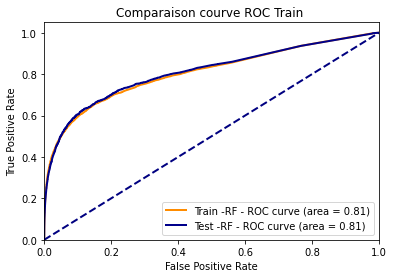

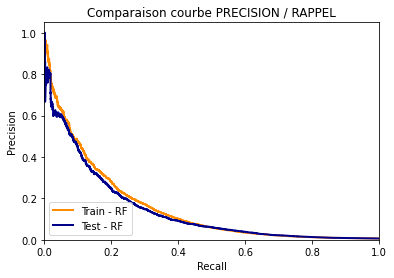

In [139]:
rf_clf = RandomForestClassifier(**opt.best_params_)

rf_clf.fit(X_train2,Y_train)

#Calcul des métriques

fpr_train_RF, tpr_train_RF, thresholds_train_RF = roc_curve(Y_train, rf_clf.predict_proba(X_train2)[:,1])
roc_auc_train_RF = auc(fpr_train_RF, tpr_train_RF)

fpr_test_RF, tpr_test_RF, thresholds_test_RF = roc_curve(Y_test, rf_clf.predict_proba(X_test2)[:,1])
roc_auc_test_RF = auc(fpr_test_RF, tpr_test_RF)

plt.figure()
lw = 2
plt.plot(fpr_train_RF, tpr_train_RF, color='darkorange',
         lw=lw, label='Train -RF - ROC curve (area = %0.2f)' % roc_auc_train_RF)
plt.plot(fpr_test_RF, tpr_test_RF, color='darkblue',
         lw=lw, label='Test -RF - ROC curve (area = %0.2f)' % roc_auc_test_RF)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC Train ')
plt.legend(loc="lower right")
plt.show()



### COURBES PRECISION RAPPEL

precision_train_RF, recall_train_RF, thresholds_train_RF = precision_recall_curve(Y_train,
                                                                         rf_clf.predict_proba(X_train2)[:,1])

precision_test_RF, recall_test_RF, thresholds_test_RF = precision_recall_curve(Y_test,
                                                                         rf_clf.predict_proba(X_test2)[:,1])

plt.figure()
lw = 2
plt.plot(recall_train_RF,precision_train_RF, color='darkorange',
         lw=lw, label='Train - RF')
plt.plot(recall_test_RF,precision_test_RF, color='darkblue',
         lw=lw, label='Test - RF')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparaison courbe PRECISION / RAPPEL')
plt.legend(loc="lower left")
plt.show()

In [ ]:
import scikitplot as skplt

plt.figure(figsize=(7,7))
Y_predict_proba = rf_clf.predict_proba(X_test)
skplt.metrics.plot_lift_curve(Y_test,Y_predict_proba  )
plt.show()
plt.show()